# Image compression using PCA

We will see how to use PCA to do image compression!

We will use the "Labeled Faces in the Wild Home" dataset from the University of Massachusetts Amherst at the following link: http://vis-www.cs.umass.edu/lfw/. It has a horde of pictures originally meant for face recognition. We will use it for image compression illustration purposes here. 

Library Imports

In [1]:
from sklearn.datasets import fetch_lfw_people
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Fetch the dataset (~300MB)
it would take a lot of time the first time you run this based on your internet connection speed

In [2]:
lfw=fetch_lfw_people() 

Print the attributes of the image dataset. The attributes are saying that there are 13233 images of size 62 x 47 (2914) pixels 

In [3]:
print(lfw.keys())

_, h, w = lfw.images.shape
print(lfw.images.shape)

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
(13233, 62, 47)


Method for plotting the images

In [4]:
def plot_gallery(images, h, w, rows=3, cols=4):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.bone)
        plt.xticks(())
        plt.yticks(())

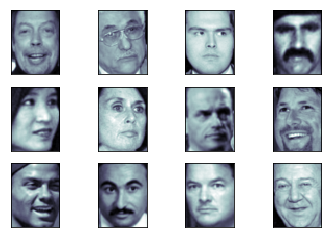

In [5]:
plot_gallery(lfw.data, h, w)

## Perform PCA / compression

Let us see how much variance on the picture is retained if we compressed these down from 62 x 47 to 12 x 10 pixel images

In [6]:
X,y=lfw.data, lfw.target 
pca_lfw = PCA(120) 
X_proj = pca_lfw.fit_transform(X) 
print(X_proj.shape)

(13233, 120)


In [7]:
print(np.cumsum(pca_lfw.explained_variance_ratio_))

[0.2333299  0.34026736 0.42260057 0.49286944 0.5253949  0.5555214
 0.5765682  0.5948076  0.61245733 0.6283155  0.6431248  0.65649754
 0.6690234  0.68064004 0.69132775 0.7009355  0.70967096 0.7174297
 0.7251415  0.7320769  0.7388188  0.7450851  0.7509918  0.75630754
 0.7614335  0.76644236 0.77128655 0.77595043 0.78030396 0.78444046
 0.7883503  0.792227   0.79589665 0.799449   0.8028753  0.80616426
 0.80937296 0.81236124 0.81530994 0.81819236 0.8210489  0.82370013
 0.82626396 0.82877964 0.8312202  0.83362955 0.8360157  0.83838123
 0.84069127 0.8429007  0.8450671  0.8471771  0.8492134  0.8512391
 0.8532442  0.85513645 0.85698193 0.85878503 0.8605521  0.86229837
 0.8640304  0.86568254 0.8673072  0.8689257  0.8704758  0.8719642
 0.8734432  0.87488544 0.87631494 0.87769186 0.8790574  0.8804031
 0.88173    0.8830417  0.8843059  0.8855691  0.8868031  0.88801736
 0.8892202  0.8904013  0.89154273 0.892677   0.8937804  0.89485896
 0.8959279  0.89697534 0.89801455 0.8990346  0.9000442  0.9010355
 

### Quite impressive! We are able to retain about 92% variance on the original images if we compressed them down to 12 x 10 pixels from an original image size of 62 x 47 pixels


The parameter `components_` of the `estimator` object gives the components with maximum variance. Below we'll try to visualize the top few principal components. This is just an eigenvector representation, NOT a reconstruction of the original data. In other words We are just visualizing the principal components as images. The principal components are vectors of the length = to the number of features 2914. We'll need to reshape it to a 62 x 47 matrix.

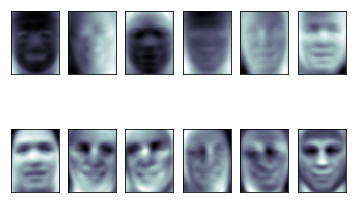

In [8]:
plot_gallery(pca_lfw.components_, 62, 47, 2, 6)

### Magnificient! let's now try to reconstruct the images using the new compressed dataset. 

In other words, we transformed the #62x47 pixel images into 12x10 images. Now to visualize how these images look we need to inverse transform the 12x10 images back to 62x47 dimension. Note that we're not reverting back to the original data, we're simply going back to the actual dimension of the original images so that we can visualize them. 

In [9]:
X_inv_proj = pca_lfw.inverse_transform(X_proj) 

#reshaping as 13233 images of 62x47 dimension 
X_proj_img = np.reshape(X_inv_proj,(13233,62,47)) 

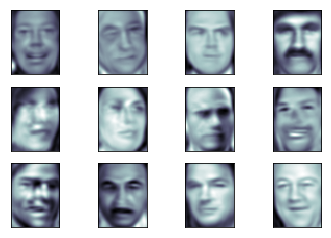

In [10]:
plot_gallery(X_proj_img, h, w)

### Not bad at all!





# Image compression on a natural picture

Let's try out a different example and save the result to compare the sizes. 
Let's import this image called "Scenery.jpg", stored in the same working directory as this notebook
The original image size is 5767 KB

(2961, 8192, 3)


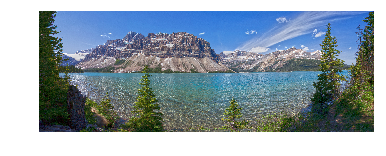

In [11]:
import matplotlib.image as mi 
img = mi.imread('Scenery.jpg') 

#Now, let's look at the size of this numpy array object img as well as plot it using imshow. 
print(img.shape)
plt.axis('off') 
plt.imshow(img)

Okay, so the array has 2961 rows each of pixels 8192x3. Let's reshape it into a format that PCA can understand. 

8192 * 3 = 24576

In [12]:
img_rs = np.reshape(img, (2961, 24576)) 
print(img_rs.shape) 

(2961, 24576)


Great, now lets run PCA with 256 components (16x16 pixels) and transform the image.

In [13]:
impca = PCA(256).fit(img_rs) 
img_cmp = impca.transform(img_rs) 
print(img_cmp.shape) 
print(np.sum(impca.explained_variance_ratio_)) 

(2961, 256)
0.9480209810346447


Awesome! looks like with 256 components we can explain about 95% of the variance. Now to visualize how PCA has performed this compression, let's inverse transform the PCA output and reshape for visualization using imshow. 

In [14]:
temp = impca.inverse_transform(img_cmp) 
print(temp.shape)

#reshaping 24576 back to the original 8192 * 3 
temp = np.reshape(temp, (2961,8192,3)) 
print(temp.shape)

(2961, 24576)
(2961, 8192, 3)


Great! now lets visualize like before with imshow and save the new picture to disk to check its size

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


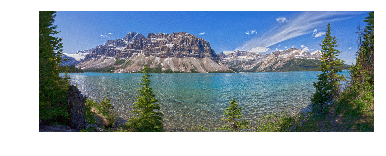

In [15]:
plt.axis('off') 
plt.imshow((temp / 255))
plt.savefig('Compressed_Scenery.jpg', bbox_inches='tight')

The resulting picture when saved on disk as "Compressed_Scenery.jpg" is a meagre 33 KB sized file. That is about 175 times smaller than the original image. We have used python Scikit-learn's PCA library out of the box. We could as well write this PCA algorithm from scratch and use that! 